In [2]:
! pip install selenium

In [10]:
url = 'https://www.naukri.com/data-science-jobs?k=data%20science'

In [11]:
import os

In [12]:
os.chdir('D:\\scripting')

In [13]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests

In [14]:
browser=webdriver.Firefox()
browser

<selenium.webdriver.firefox.webdriver.WebDriver (session="033836a7-9f62-4064-b729-679134407c30")>

In [15]:
browser.get(url)

'<html lang="en"><head><title>Data Science Jobs, 27819 Data Science Openings - Naukri.com</title><meta name="description" content="Apply To 27819 Data Science Jobs On Naukri.com, India\'s No.1 Job Portal. Explore Data Science Openings In Your Desired Locations Now!"><link rel="alternate" href="android-app://naukriApp.appModules.login/https/www.naukri.com/data-science-jobs"><link rel="canonical" href="https://www.naukri.com/data-science-jobs"><meta name="atdlayout" content="jobsearch"><meta name="robots" content="ALL"><meta name="classification" content="Jobs &amp; Career: Job Search, Apply Jobs, Post Jobs"><meta name="pragma" content="no-cache"><meta name="rating" content="general"><meta name="revisit-after" content="1 day"><meta name="distribution" content="GLOBAL"><meta name="resource-type" content="document"><meta name="author" content="www.naukri.com"><meta name="content-language" content="EN"><meta property="fb:app_id" content="171330469593307"><meta name="copyright" content="2022
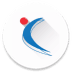

In [17]:
html=browser.page_source
html

In [18]:
soup=BeautifulSoup(html,'html.parser')

<html lang="en"><head><title>Data Science Jobs, 27819 Data Science Openings - Naukri.com</title><meta content="Apply To 27819 Data Science Jobs On Naukri.com, India's No.1 Job Portal. Explore Data Science Openings In Your Desired Locations Now!" name="description"/><link href="android-app://naukriApp.appModules.login/https/www.naukri.com/data-science-jobs" rel="alternate"/><link href="https://www.naukri.com/data-science-jobs" rel="canonical"/><meta content="jobsearch" name="atdlayout"/><meta content="ALL" name="robots"/><meta content="Jobs &amp; Career: Job Search, Apply Jobs, Post Jobs" name="classification"/><meta content="no-cache" name="pragma"/><meta content="general" name="rating"/><meta content="1 day" name="revisit-after"/><meta content="GLOBAL" name="distribution"/><meta content="document" name="resource-type"/><meta content="www.naukri.com" name="author"/><meta content="EN" name="content-language"/><meta content="171330469593307" property="fb:app_id"/><meta content="2022 Nauk
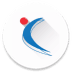

In [19]:
print(soup)

In [20]:
soup.title

<title>Data Science Jobs, 27819 Data Science Openings - Naukri.com</title>

```<soup_object>.select("<tag_name>.<class_name1>.<class_name2>.<class_nam3>....")```

# job name scraping

In [21]:
soup.find_all('a',class_='title fw500 ellipsis')[0].text

'Data Science/Data Analyst'

replacing 'find-all()' with 'select()'
reason: beacause we will be dealing with lot of dynamic web pages that has css attributes and also multiple class name.

rule of using select()-> we need to replace with .operator for class name and tag and multiple class name should be attached using .operator

In [22]:
soup.select('a.title.fw500.ellipsis')

[<a class="title fw500 ellipsis" href="https://www.naukri.com/job-listings-data-science-data-analyst-findoc-finvest-private-limited-gurgaon-gurugram-4-to-7-years-130122500318?src=jobsearchDesk&amp;sid=16449021956956476&amp;xp=1&amp;px=1" target="_blank" title="Data Science/Data Analyst">Data Science/Data Analyst</a>,
 <a class="title fw500 ellipsis" href="https://www.naukri.com/job-listings-python-trainer-data-science-trainer-cqs-training-private-limited-new-delhi-0-to-4-years-140222002377?src=jobsearchDesk&amp;sid=16449021956956476&amp;xp=2&amp;px=1" target="_blank" title="Python Trainer &amp; Data Science Trainer">Python Trainer &amp; Data Science Trainer</a>,
 <a class="title fw500 ellipsis" href="https://www.naukri.com/job-listings-analyst-data-science-accenture-solutions-pvt-ltd-bangalore-bengaluru-3-to-5-years-140222901392?src=jobsearchDesk&amp;sid=16449021956956476&amp;xp=3&amp;px=1" target="_blank" title="Analyst- Data Science">Analyst- Data Science</a>,
 <a class="title fw500 

# Job Role Scraping

In [27]:
job_role=[i.text.strip() for i in soup.select('a.title.fw500.ellipsis')]
job_role

['Data Science/Data Analyst',
 'Python Trainer & Data Science Trainer',
 'Analyst- Data Science',
 'Senior Analyst-Data Science',
 'Senior Research Analyst / Asst Manager Data Science',
 'Data science +  Python - NP Max 45 days',
 'Opening with Data Science',
 'Specialist in VBA For Quantitative Analysis and Data Science',
 'Senior Analyst-Data Science',
 'Senior Analyst - Data Science',
 'Looking For Part Time Data Science Trainer (WFH) with LetsUpgrade',
 'Python / Data Analytics / Data Science Trainer @ TechVidya',
 'Senior Director -  Data Science',
 'Senior Analyst - Data Science - IIT/NIT/IIM/XLRI/FMS',
 'Senior Analyst - Data Science - IIT/NIT/IIM/XLRI/FMS',
 'Expert Data Science',
 'Analyst: Data Science Insights',
 'Job Support - Data Science/Data Analyst',
 'Senior Analyst-Data Science',
 'Data Science Manager- Artificial Intelligence']

# company scraping

In [24]:
soup.select('a.subTitle.ellipsis.fleft')[0].text

'Findoc Finvest Private Limited'

In [28]:
company=[i.text.strip() for i in soup.select('a.subTitle.ellipsis.fleft')]
company

['Findoc Finvest Private Limited',
 'CQS TRAINING PRIVATE LIMITED',
 'Accenture',
 'Accenture',
 'TrizTeck Intellectual Property Solutions LLP',
 'ERM Placement Services (P) Ltd.',
 'Pricewater House Coopers Service Delivery Center    Bangalore Private Limited',
 'Gartner',
 'Accenture',
 'Tiger Analytics India LLP',
 'ITM Edutech (India) Limited',
 'TECHVIDYA CAREER PVT. LTD.',
 'Course5',
 'Huquo Consulting Pvt. Ltd',
 'Huquo Consulting Pvt. Ltd',
 'Novartis Healthcare',
 'TIGER ANALYTICS INDIA CONSULTING PRIVATE LIMITED',
 'LAVSUN Technologies Inc.',
 'Accenture',
 'Spectral Consultants -Search and Recruitments Firm']

# YOE

In [29]:
soup.select('span.ellipsis.fleft.fs12.lh16 ')

[<span class="ellipsis fleft fs12 lh16" title="4-7 Yrs ">4-7 Yrs</span>,
 <span class="ellipsis fleft fs12 lh16" title="Not disclosed ">Not disclosed</span>,
 <span class="ellipsis fleft fs12 lh16" title="Gurgaon/Gurugram ">Gurgaon/Gurugram</span>,
 <span class="ellipsis fleft fs12 lh16" title="0-4 Yrs ">0-4 Yrs</span>,
 <span class="ellipsis fleft fs12 lh16" title="2,50,000 - 3,00,000 PA. ">2,50,000 - 3,00,000 PA.</span>,
 <span class="ellipsis fleft fs12 lh16" title="New Delhi(B1 Block Janakpuri) ">New Delhi(B1 Block Janakpuri)</span>,
 <span class="ellipsis fleft fs12 lh16" title="3-5 Yrs ">3-5 Yrs</span>,
 <span class="ellipsis fleft fs12 lh16" title="Not disclosed ">Not disclosed</span>,
 <span class="ellipsis fleft fs12 lh16" title="Bangalore/Bengaluru ">Bangalore/Bengaluru</span>,
 <span class="ellipsis fleft fs12 lh16" title="2-6 Yrs ">2-6 Yrs</span>,
 <span class="ellipsis fleft fs12 lh16" title="Not disclosed ">Not disclosed</span>,
 <span class="ellipsis fleft fs12 lh16" tit

In [31]:
soup.select('ul.mt-7')[0].find_all('li')[0].text

'4-7 Yrs'

In [32]:
yoe=[i.find_all('li')[0].text.strip() for i in soup.select('ul.mt-7')]
yoe

['4-7 Yrs',
 '0-4 Yrs',
 '3-5 Yrs',
 '2-6 Yrs',
 '2-5 Yrs',
 '3-5 Yrs',
 '2-5 Yrs',
 '1-3 Yrs',
 '5-8 Yrs',
 '1-6 Yrs',
 '0-5 Yrs',
 '1-6 Yrs',
 '10-15 Yrs',
 '2-5 Yrs',
 '2-5 Yrs',
 '2-5 Yrs',
 '1-4 Yrs',
 '5-10 Yrs',
 '5-8 Yrs',
 '9-14 Yrs']

In [33]:
ctc=[i.find_all('li')[1].text.strip() for i in soup.select('ul.mt-7')]
ctc

['Not disclosed',
 '2,50,000 - 3,00,000 PA.',
 'Not disclosed',
 'Not disclosed',
 '4,75,000 - 7,50,000 PA.',
 'Not disclosed',
 'Not disclosed',
 'Not disclosed',
 'Not disclosed',
 'Not disclosed',
 'Not disclosed',
 '2,50,000 - 6,00,000 PA.',
 '25,00,000 - 40,00,000 PA.',
 'Not disclosed',
 'Not disclosed',
 'Not disclosed',
 'Not disclosed',
 '50,000 - 60,000 PA.',
 'Not disclosed',
 'Not disclosed']

In [34]:
location=[i.find_all('li')[2].text.strip() for i in soup.select('ul.mt-7')]
location

['Gurgaon/Gurugram',
 'New Delhi(B1 Block Janakpuri)',
 'Bangalore/Bengaluru',
 'Bangalore/Bengaluru',
 'New Delhi(Greater Kailash)',
 'Kolkata, Hyderabad/Secunderabad, Chennai, Bangalore/Bengaluru, Delhi / NCR, Mumbai (All Areas)',
 'Kolkata, Hyderabad/Secunderabad, Pune, Ahmedabad, Chennai, Bangalore/Bengaluru, Delhi / NCR, Mumbai (All Areas)',
 'Gurgaon/Gurugram',
 'Mumbai',
 'Chennai(WFH during Covid)',
 'Hyderabad/Secunderabad, Navi Mumbai, Gurgaon/Gurugram, Chennai, Bangalore/Bengaluru, Mumbai (All Areas)',
 'Noida(Sector-2 Noida)',
 'Gurgaon/Gurugram, Bangalore/Bengaluru',
 'Gurgaon/Gurugram',
 'Gurgaon/Gurugram',
 'Hyderabad/Secunderabad',
 'Chennai',
 'Remote',
 'Bangalore/Bengaluru',
 'Pune, Gurgaon/Gurugram, Bangalore/Bengaluru']

In [35]:
import pandas as pd
def naukari(soup):
    job_role=[i.text.strip() for i in soup.select('a.title.fw500.ellipsis')]
    company=[i.text.strip() for i in soup.select('a.subTitle.ellipsis.fleft')]
    yoe=[i.find_all('li')[0].text.strip() for i in soup.select('ul.mt-7')]
    ctc=[i.find_all('li')[1].text.strip() for i in soup.select('ul.mt-7')]
    location=[i.find_all('li')[2].text.strip() for i in soup.select('ul.mt-7')]
    return pd.DataFrame({'position':job_role,'company name':company,'yoe':yoe,'ctc':ctc,'location':location})

In [36]:
df=naukari(soup)

In [37]:
df.head()

,position,company name,yoe,ctc,location
0,Data Science/Data Analyst,Findoc Finvest Private Limited,4-7 Yrs,Not disclosed,Gurgaon/Gurugram
1,Python Trainer & Data Science Trainer,CQS TRAINING PRIVATE LIMITED,0-4 Yrs,"2,50,000 - 3,00,000 PA.",New Delhi(B1 Block Janakpuri)
2,Analyst- Data Science,Accenture,3-5 Yrs,Not disclosed,Bangalore/Bengaluru
3,Senior Analyst-Data Science,Accenture,2-6 Yrs,Not disclosed,Bangalore/Bengaluru
4,Senior Research Analyst / Asst Manager Data Sc...,TrizTeck Intellectual Property Solutions LLP,2-5 Yrs,"4,75,000 - 7,50,000 PA.",New Delhi(Greater Kailash)


In [38]:
df.shape

(20, 5)

In [39]:
df.to_csv("naukari.com.csv")

In [41]:
pd.read_csv("naukari.com.csv").head()

,Unnamed: 0,position,company name,yoe,ctc,location
0,0,Data Science/Data Analyst,Findoc Finvest Private Limited,4-7 Yrs,Not disclosed,Gurgaon/Gurugram
1,1,Python Trainer & Data Science Trainer,CQS TRAINING PRIVATE LIMITED,0-4 Yrs,"2,50,000 - 3,00,000 PA.",New Delhi(B1 Block Janakpuri)
2,2,Analyst- Data Science,Accenture,3-5 Yrs,Not disclosed,Bangalore/Bengaluru
3,3,Senior Analyst-Data Science,Accenture,2-6 Yrs,Not disclosed,Bangalore/Bengaluru
4,4,Senior Research Analyst / Asst Manager Data Sc...,TrizTeck Intellectual Property Solutions LLP,2-5 Yrs,"4,75,000 - 7,50,000 PA.",New Delhi(Greater Kailash)


In [49]:
studs= 'https://www.naukri.com/data-science-jobs-{}?k=data%20science'

In [50]:
studs.format(5)

'https://www.naukri.com/data-science-jobs-5?k=data%20science'

## 20 pages from naukari.com

In [54]:
tables=[]
from tqdm import tqdm
import time
for i in tqdm(range(1,21)):
    url_pages =studs.format(i)
    browser.get(url_pages)
    time.sleep(5)
    html = browser.page_source
    soup = BeautifulSoup(html,'html.parser')
    tables.append(naukari(soup))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:52<00:00,  5.64s/it]


In [55]:
open_naukari=pd.concat(tables,axis=0)
open_naukari

,position,company name,yoe,ctc,location
0,Data Science/Data Analyst,Findoc Finvest Private Limited,4-7 Yrs,Not disclosed,Gurgaon/Gurugram
1,Python Trainer & Data Science Trainer,CQS TRAINING PRIVATE LIMITED,0-4 Yrs,"2,50,000 - 3,00,000 PA.",New Delhi(B1 Block Janakpuri)
2,Analyst- Data Science,Accenture,3-5 Yrs,Not disclosed,Bangalore/Bengaluru
3,Senior Analyst-Data Science,Accenture,2-6 Yrs,Not disclosed,Bangalore/Bengaluru
4,Senior Research Analyst / Asst Manager Data Sc...,TrizTeck Intellectual Property Solutions LLP,2-5 Yrs,"4,75,000 - 7,50,000 PA.",New Delhi(Greater Kailash)
...,...,...,...,...,...
15,Lead Data Science Engineer - NLP/Algorithm,Huquo Consulting Pvt. Ltd,2-7 Yrs,Not disclosed,Gurgaon/Gurugram
16,Data Science Engineer - Predictive Modeling/Py...,Huquo Consulting Pvt. Ltd,2-7 Yrs,Not disclosed,Gurgaon/Gurugram
17,Machine Learning Engineer (Data Science),Walmart,3-6 Yrs,Not disclosed,Bangalore/Bengaluru
18,Data Engineer - Data Science Engineering,WAKEFIT INNOVATIONS PRIVATE LIMITED,2-5 Yrs,Not disclosed,Bangalore/Bengaluru


In [57]:
open_naukari.to_csv("naukari_400.csv")
pd.read_csv("naukari_400.csv").head()

,Unnamed: 0,position,company name,yoe,ctc,location
0,0,Data Science/Data Analyst,Findoc Finvest Private Limited,4-7 Yrs,Not disclosed,Gurgaon/Gurugram
1,1,Python Trainer & Data Science Trainer,CQS TRAINING PRIVATE LIMITED,0-4 Yrs,"2,50,000 - 3,00,000 PA.",New Delhi(B1 Block Janakpuri)
2,2,Analyst- Data Science,Accenture,3-5 Yrs,Not disclosed,Bangalore/Bengaluru
3,3,Senior Analyst-Data Science,Accenture,2-6 Yrs,Not disclosed,Bangalore/Bengaluru
4,4,Senior Research Analyst / Asst Manager Data Sc...,TrizTeck Intellectual Property Solutions LLP,2-5 Yrs,"4,75,000 - 7,50,000 PA.",New Delhi(Greater Kailash)
